In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_frame = pd.read_csv("appliance_energy.csv")   #comma separated values
data_frame.head(5)

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


In [5]:
data_frame.isnull().sum()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64

In [6]:
data_frame.dtypes

Temperature (°C)            float64
Energy Consumption (kWh)    float64
dtype: object

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (°C)          100 non-null    float64
 1   Energy Consumption (kWh)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [9]:
data_frame.shape

(100, 2)

Text(0, 0.5, 'Energy Consumption (kWh)')

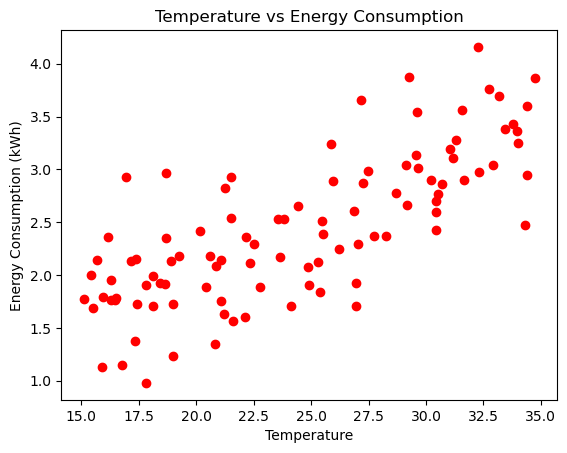

In [17]:
# If the degree symbol is in your dataframe's column names, remove it
data_frame.columns = data_frame.columns.str.replace('°', '', regex=False)

# Now plot the scatter plot without the degree symbol
plt.scatter(data_frame['Temperature (C)'], data_frame['Energy Consumption (kWh)'], color='red')
plt.title('Temperature vs Energy Consumption')

plt.xlabel('Temperature')
plt.ylabel('Energy Consumption (kWh)')


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
X=data_frame[['Temperature (C)']]
y=data_frame[['Energy Consumption (kWh)']]

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=model.predict(X_test)   # Make prediction on test data 

In [28]:
y_pred

array([[1.6858187 ],
       [3.18154068],
       [2.96097494],
       [2.76354868],
       [2.0370856 ],
       [2.36343345],
       [2.09711944],
       [3.12445907],
       [1.60849483],
       [2.24537556],
       [2.34866555],
       [2.66462648],
       [3.0387357 ],
       [3.27880886],
       [1.78664542],
       [1.85218469],
       [2.95922164],
       [1.70468695],
       [3.0692904 ],
       [1.87828475]])

EVALUATE THE MODEL

In [31]:
#Calculate the Mean Square Error
mse=mean_squared_error(y_test,y_pred)
print("Mean Square error",mse)

#calculate R-squared value
r2=r2_score(y_test,y_pred)
print("R-squared value:",r2)

Mean Square error 0.16342487842925058
R-squared value: 0.6119478445218713


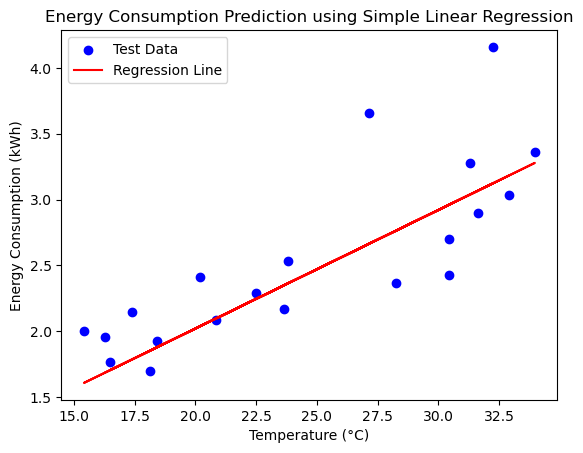

In [32]:
#scatter plot between actual and predicted
# Plot the test data and regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data')  # Actual data
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [33]:
import joblib
#save the model to a file
joblib.dump(model,'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [34]:
model=joblib.load('appliance_energy_model.pkl')

In [35]:
input_data=[[26.97]]

In [40]:
prediction=model.predict(input_data)
print("Predicted appliance energy consumption", prediction)

Predicted appliance energy consumption [[2.64835187]]


C:\Users\swapnil\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
